In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from os import chdir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve

In [2]:
import os 
subdirectory_path = r"C:\Users\aadis\OneDrive\Desktop\beng\Dataset\Dataset"
os.chdir(subdirectory_path)

# read .csv file with pandas.read_csv
data = pd.read_csv('diabetic_data_training.csv',low_memory=False)


In [5]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [6]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
data.shape

(91589, 50)

In [3]:
duplicates = data[data.duplicated(subset='patient_nbr', keep=False)]
num_duplicates = duplicates.shape[0]
print('Total number of duplicate patients rows:',num_duplicates)

Total number of duplicate patients rows: 40379


In [ ]:
# Note: Duplicate instances  

https://yungchou.github.io/site/ 
    

In [4]:

data_sorted = data.sort_values(by='time_in_hospital', ascending=False)
data = data_sorted.drop_duplicates(subset='patient_nbr', keep='first')
data.reset_index(drop=True, inplace=True) 
# Kept only the first encounter for each 'patient_nbr' with max time_in_hospital

In [5]:
data.shape

(65932, 50)

In [ ]:
# Note: Check out features that do not relate to diabetes

In [6]:
features_to_drop = ['payer_code', 'medical_specialty', 'patient_nbr','encounter_id','weight','examide','citoglipton','glimepiride-pioglitazone']
data = data.drop(columns=features_to_drop, axis=1)

In [87]:
print(data['diag_1'].head(),data['diag_2'].head(),data['diag_3'].head())

0      161
1      440
2    250.8
3      486
4      997
Name: diag_1, dtype: object 0    496
1    682
2    518
3    707
4    599
Name: diag_2, dtype: object 0      512
1      707
2      707
3    250.8
4      576
Name: diag_3, dtype: object


In [7]:
columns_to_replace = ['diag_1', 'diag_2', 'diag_3']

for column in columns_to_replace:
    data[column] = data[column].replace('?', 0)
#Replace ? with 0 

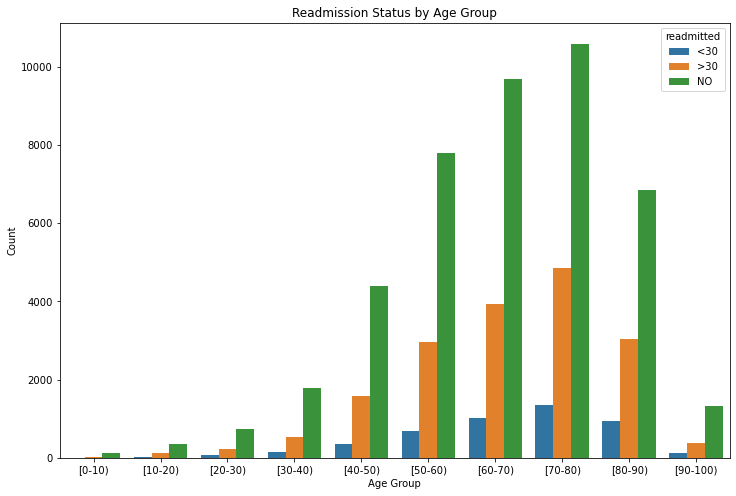

In [13]:


#Readmission vs Age
plt.figure(figsize=(12, 8))
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
sns.countplot(x='age', hue='readmitted', data=data, order=age_order)
plt.title('Readmission Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [38]:
#VISUALIZING VARIOUS FEATURES

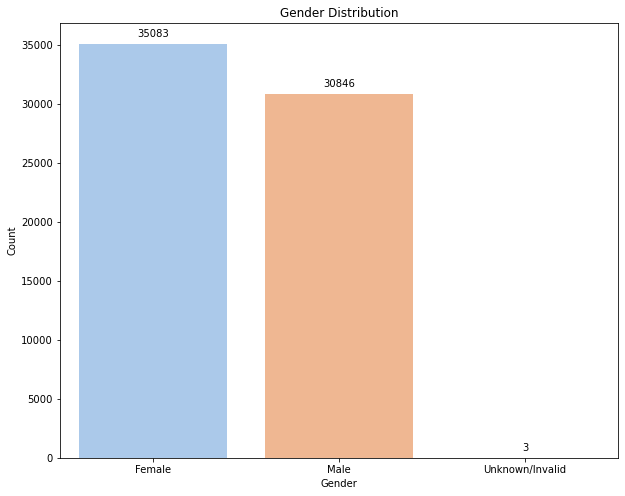

In [39]:
#Gender


plt.figure(figsize=(10, 8))
ax = sns.countplot(x='gender', data=data, palette='pastel')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
# Impute Race with clustering

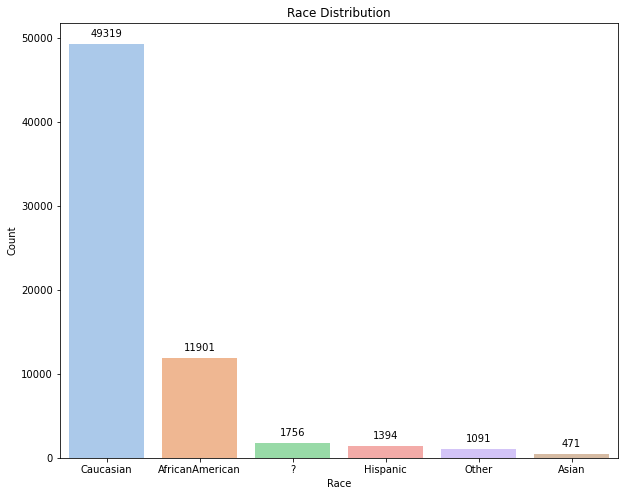

In [40]:
#Race

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='race', data=data, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [8]:

data['diag_1'] = pd.to_numeric(data['diag_1'],errors='coerce')

In [10]:

# Label Mapping 
group_mapping = {
    'Circulatory': list(range(390, 460)) + [785],
    'Respiratory': list(range(460, 520)) + [786],
    'Digestive': list(range(520, 580)) + [787],
    'Diabetes': [250 + i / 100.0 for i in range(1, 100)],  # Include decimals from 250.00 to 250.99
    'Injury': list(range(800, 1000)),
    'Musculoskeletal': list(range(710, 740)),
    'Genitourinary': list(range(580, 630)) + [788],
    'Neoplasms': list(range(140, 240)) + [780, 781, 784] + list(range(790, 800)) + list(range(240, 280)) + list(range(680, 710)) + [782] + list(range(1, 140)) + list(range(290, 320))
}

data['diag_1_group'] = data['diag_1'].apply(lambda x: next((k for k, v in group_mapping.items() if x in v), 'Unknown'))

# Assign numerical values to each category
category_numerical_mapping = {
    'Circulatory': 1,
    'Respiratory': 2,
    'Digestive': 3,
    'Diabetes': 4,
    'Injury': 5,
    'Musculoskeletal': 6,
    'Genitourinary': 7,
    'Neoplasms': 8,
}

data['diag_1_numerical'] = data['diag_1_group'].map(category_numerical_mapping)
data['diag_1_numerical'].fillna(9, inplace=True)

print(data[['diag_1', 'diag_1_group', 'diag_1_numerical']].head(40))

    diag_1 diag_1_group  diag_1_numerical
0   161.00    Neoplasms               8.0
1   440.00  Circulatory               1.0
2   250.80     Diabetes               4.0
3   486.00  Respiratory               2.0
4   997.00       Injury               5.0
5   250.82     Diabetes               4.0
6   434.00  Circulatory               1.0
7   294.00    Neoplasms               8.0
8   250.70     Diabetes               4.0
9   996.00       Injury               5.0
10  410.00  Circulatory               1.0
11     NaN      Unknown               9.0
12  296.00    Neoplasms               8.0
13  414.00  Circulatory               1.0
14  578.00    Digestive               3.0
15  997.00       Injury               5.0
16  296.00    Neoplasms               8.0
17  577.00    Digestive               3.0
18  427.00  Circulatory               1.0
19  486.00  Respiratory               2.0
20   38.00    Neoplasms               8.0
21  574.00    Digestive               3.0
22  414.00  Circulatory           

In [11]:
data['diag_2'] = pd.to_numeric(data['diag_2'],errors='coerce')
data['diag_3'] = pd.to_numeric(data['diag_3'],errors='coerce') 

data['diag_2_group'] = data['diag_2'].apply(lambda x: next((k for k, v in group_mapping.items() if x in v), 'Unknown'))
data['diag_2_numerical'] = data['diag_2_group'].map(category_numerical_mapping)
data['diag_2_numerical'].fillna(9, inplace=True)

# Apply the same code for 'diag_3'
data['diag_3_group'] = data['diag_3'].apply(lambda x: next((k for k, v in group_mapping.items() if x in v), 'Unknown'))
data['diag_3_numerical'] = data['diag_3_group'].map(category_numerical_mapping)
data['diag_3_numerical'].fillna(9, inplace=True)

print(data[['diag_1', 'diag_1_group', 'diag_1_numerical', 'diag_2', 'diag_2_group', 'diag_2_numerical', 'diag_3', 'diag_3_group', 'diag_3_numerical']].head(40))

    diag_1 diag_1_group  diag_1_numerical  diag_2     diag_2_group  \
0   161.00    Neoplasms               8.0  496.00      Respiratory   
1   440.00  Circulatory               1.0  682.00        Neoplasms   
2   250.80     Diabetes               4.0  518.00      Respiratory   
3   486.00  Respiratory               2.0  707.00        Neoplasms   
4   997.00       Injury               5.0  599.00    Genitourinary   
5   250.82     Diabetes               4.0  788.00    Genitourinary   
6   434.00  Circulatory               1.0  780.00        Neoplasms   
7   294.00    Neoplasms               8.0  250.81         Diabetes   
8   250.70     Diabetes               4.0   40.00        Neoplasms   
9   996.00       Injury               5.0  511.00      Respiratory   
10  410.00  Circulatory               1.0  428.00      Circulatory   
11     NaN      Unknown               9.0  719.00  Musculoskeletal   
12  296.00    Neoplasms               8.0  496.00      Respiratory   
13  414.00  Circulat

In [12]:
#Readmission correlation with other 41 features

print(data['readmitted'].dtypes)

object


In [92]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'diag_1_group', 'diag_1_numerical',
       'diag_2_group', 'diag_2_numerical', 'diag_3_group', 'diag_3_numerical'],
      dtype='object')

In [13]:
features_to_drop = ['diag_1', 'diag_2', 'diag_3','diag_1_group','diag_2_group','diag_3_group']
data = data.drop(columns=features_to_drop, axis=1)

In [18]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'diag_1_numerical', 'diag_2_numerical',
       'diag_3_numerical'],
      dtype='object')

In [14]:
le = LabelEncoder()
data['readmitted_encoded'] = le.fit_transform(data['readmitted'])
print("Mapping of original values to encoded values:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} : {encoded}")

Mapping of original values to encoded values:
<30 : 0
>30 : 1
NO : 2


In [15]:
features_to_drop = ['readmitted']
data = data.drop(columns=features_to_drop, axis=1)

In [ ]:
# Correlation only based on readmission 
# Labelly encode the rest of the features 

<AxesSubplot:>

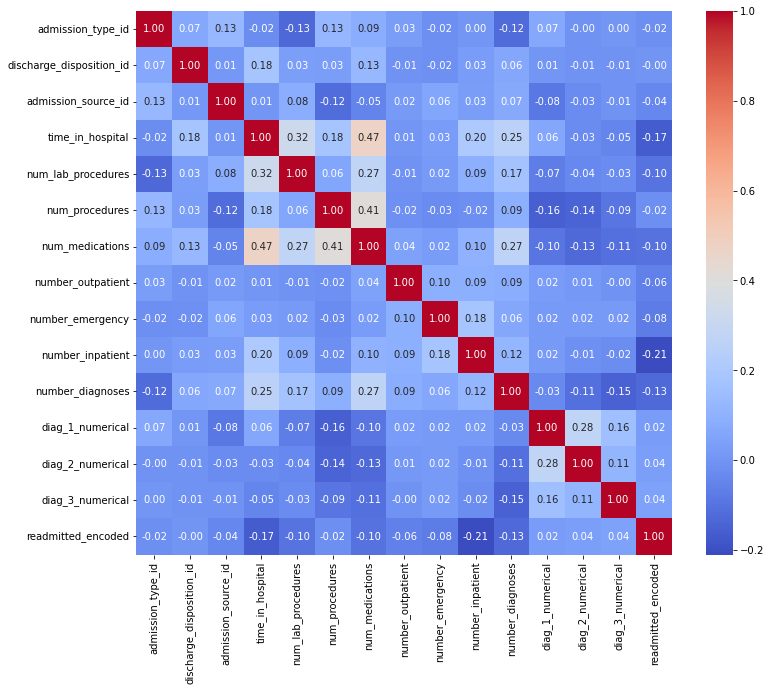

In [15]:
correlation_matrix = data.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

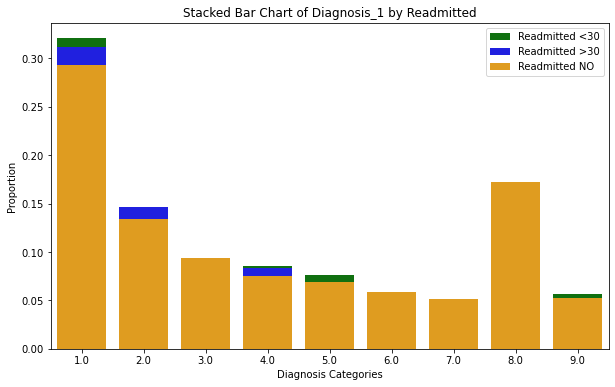

In [19]:
# Mapping of original values to encoded values
readmitted_mapping = {0: '<30', 1: '>30', 2: 'NO'}

# Map encoded values to their original labels
data['readmitted_label'] = data['readmitted_encoded'].map(readmitted_mapping)

# Group data
grouped_data = data.groupby(['readmitted_label', 'diag_1_numerical']).size().unstack()

# Normalize the data to get proportions
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.columns, y=grouped_data.loc['<30'], label='Readmitted <30', color='green')
sns.barplot(x=grouped_data.columns, y=grouped_data.loc['>30'], label='Readmitted >30', color='blue')
sns.barplot(x=grouped_data.columns, y=grouped_data.loc['NO'], label='Readmitted NO', color='orange')

plt.title('Stacked Bar Chart of Diagnosis_1 by Readmitted')
plt.xlabel('Diagnosis Categories')
plt.ylabel('Proportion')
plt.legend()
plt.show()

In [20]:
data['readmitted_encoded'].value_counts()

2    43611
1    17637
0     4684
Name: readmitted_encoded, dtype: int64

In [22]:
column_types = data.dtypes

for column, dtype in column_types.items():
    print(f'Column: {column}, Type: {dtype}')

Column: race, Type: object
Column: gender, Type: object
Column: age, Type: object
Column: admission_type_id, Type: int64
Column: discharge_disposition_id, Type: int64
Column: admission_source_id, Type: int64
Column: time_in_hospital, Type: int64
Column: num_lab_procedures, Type: int64
Column: num_procedures, Type: int64
Column: num_medications, Type: int64
Column: number_outpatient, Type: int64
Column: number_emergency, Type: int64
Column: number_inpatient, Type: int64
Column: number_diagnoses, Type: int64
Column: max_glu_serum, Type: object
Column: A1Cresult, Type: object
Column: metformin, Type: object
Column: repaglinide, Type: object
Column: nateglinide, Type: object
Column: chlorpropamide, Type: object
Column: glimepiride, Type: object
Column: acetohexamide, Type: object
Column: glipizide, Type: object
Column: glyburide, Type: object
Column: tolbutamide, Type: object
Column: pioglitazone, Type: object
Column: rosiglitazone, Type: object
Column: acarbose, Type: object
Column: migli

In [24]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_numerical,diag_2_numerical,diag_3_numerical,readmitted_encoded,readmitted_label
0,Caucasian,Female,[80-90),1,6,7,14,53,3,12,...,No,No,No,No,Yes,8.0,2.0,2.0,0,<30
1,AfricanAmerican,Female,[70-80),1,18,7,14,50,3,37,...,No,No,No,No,Yes,1.0,8.0,8.0,0,<30
2,Caucasian,Female,[60-70),3,3,1,14,64,1,50,...,No,No,No,Ch,Yes,4.0,2.0,8.0,1,>30
3,Caucasian,Female,[90-100),2,3,7,14,55,6,17,...,No,No,No,Ch,Yes,2.0,8.0,4.0,2,NO
4,Caucasian,Female,[70-80),1,6,7,14,28,2,16,...,No,No,No,No,No,5.0,7.0,3.0,1,>30


In [16]:
data.columns


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'diag_1_numerical', 'diag_2_numerical',
       'diag_3_numerical', 'readmitted_encoded'],
      dtype='object')

In [18]:

label_encoder = LabelEncoder()
features_to_encode = ['max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed']
for column in features_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [19]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,diag_1_numerical,diag_2_numerical,diag_3_numerical,readmitted_encoded
0,Caucasian,Female,[80-90),1,6,7,14,53,3,12,...,1,0,0,0,1,1,8.0,2.0,2.0,0
1,AfricanAmerican,Female,[70-80),1,18,7,14,50,3,37,...,1,0,0,0,1,1,1.0,8.0,8.0,0
2,Caucasian,Female,[60-70),3,3,1,14,64,1,50,...,1,0,0,0,0,1,4.0,2.0,8.0,1
3,Caucasian,Female,[90-100),2,3,7,14,55,6,17,...,1,0,0,0,0,1,2.0,8.0,4.0,2
4,Caucasian,Female,[70-80),1,6,7,14,28,2,16,...,1,0,0,0,1,0,5.0,7.0,3.0,1


In [24]:
correlation_matrix = data.corr() 
print(correlation_matrix['readmitted_encoded'])

admission_type_id          -0.017136
discharge_disposition_id   -0.001523
admission_source_id        -0.042162
time_in_hospital           -0.167198
num_lab_procedures         -0.097754
num_procedures             -0.016500
num_medications            -0.102247
number_outpatient          -0.063010
number_emergency           -0.077699
number_inpatient           -0.210053
number_diagnoses           -0.126456
max_glu_serum               0.014808
A1Cresult                   0.002173
metformin                   0.020538
repaglinide                -0.021189
nateglinide                -0.006338
chlorpropamide             -0.001662
glimepiride                -0.002662
acetohexamide              -0.003711
glipizide                  -0.022158
glyburide                  -0.003330
tolbutamide                 0.001468
pioglitazone               -0.011653
rosiglitazone              -0.014209
acarbose                   -0.006631
miglitol                    0.002941
troglitazone               -0.002799
t